# Section 1 Input & Preprocessing

In [1]:
from scripts.libInput import *
from scripts.libPreprocessing import *
from scripts.libProfileCalculation import *
from scripts.libOutput import *
from scripts.libPlotting import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
linkConfig = './config/config.yaml'
config = yaml.load(open(linkConfig), Loader=yaml.SafeLoader)
linkDict, scalars, driveProfilesRaw, plugProfilesRaw = readVencoInput(config)
outputConfig = yaml.load(open(linkDict['linkOutputConfig']), Loader=yaml.SafeLoader)
indices = ['CASEID', 'PKWID']
driveProfiles, plugProfiles = indexProfile(driveProfilesRaw, plugProfilesRaw, indices)
scalarsProc = procScalars(driveProfilesRaw, plugProfilesRaw, driveProfiles, plugProfiles)

Reading Venco input scalars, drive profiles and boolean plug profiles
There are 17863 drive profiles and 17863 plug profiles.


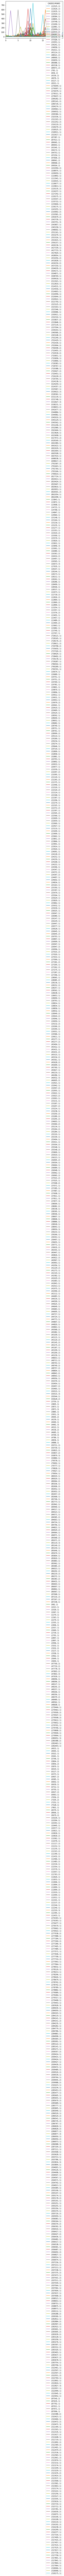

In [4]:
driveProfiles.iloc[0:1000,:].T.plot()

In [9]:
plugProfiles

,,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
CASEID,PKWID,,,,,,,,,,,,,,,,,,,,,
12525,2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True
12626,2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
12635,1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15419,1,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,True,True,True,True,True,True
18584,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712937,1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
330585,1,True,True,True,True,True,True,True,False,True,True,...,True,True,True,False,False,False,True,False,True,True
332580,1,True,True,True,True,True,True,True,False,False,False,...,False,True,True,True,True,True,True,True,True,True


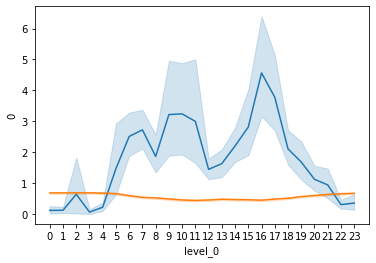

In [11]:
sns.lineplot(x='level_0', y=0, data=driveProfiles.iloc[0:1000,:].unstack(level=[0,1]).reset_index(), sort=False)
sns.lineplot(x='level_0', y=0, data=plugProfiles.iloc[0:1000,:].unstack(level=[0,1]).reset_index(), sort=False)

# Section 2 Profile Calculation

In [12]:
consumptionProfiles = calcConsumptionProfiles(driveProfiles, scalars)
chargeProfiles = calcChargeProfiles(plugProfiles, scalars)

In [13]:
chargeMaxProfiles = calcChargeMaxProfiles(chargeProfiles,
                                              consumptionProfiles,
                                              scalars,
                                              scalarsProc,
                                              nIter=100)

462867.69950000005
21800.44550000003
5295.789499999955
2885.2955000000075
1730.4420000000391
1325.3654999999562
931.7380000000121
703.1790000000037
580.0100000000093
490.92249999998603
444.8935000000056
377.8390000000363
320.4389999998966
260.9300000000512
218.98499999998603
186.67950000008568
163.94550000003073
145.90999999991618
126.14500000001863
114.18849999993108
103.0635000000475
91.98099999991246
78.6610000000801
73.79099999996834
67.2510000000475
59.37349999998696
55.67350000003353
51.228499999968335
46.538500000024214
44.4134999999078
38.21350000007078
31.20250000001397
28.168499999912456
24.752000000094995
22.430999999982305
20.953499999945052
18.633499999996275
17.570999999996275
16.62899999995716
13.037000000011176
12.437000000150874
12.266999999876134
11.787000000011176
9.027000000001863
9.027000000001863
9.027000000118278
9.026999999885447
9.027000000001863
9.027000000001863
9.027000000001863
9.027000000001863
8.62699999997858
8.427000000025146
8.34699999995064
5.86700000

In [14]:
chargeProfilesUncontrolled = calcChargeProfilesUncontrolled(chargeMaxProfiles,
                                                                scalarsProc)
driveProfilesFuelAux = calcDriveProfilesFuelAux(chargeMaxProfiles,
                                                    chargeProfilesUncontrolled,
                                                    driveProfiles,
                                                    scalars,
                                                    scalarsProc)

In [15]:
chargeMinProfiles = calcChargeMinProfiles(chargeProfiles,
                                              consumptionProfiles,
                                              driveProfilesFuelAux,
                                              scalars,
                                              scalarsProc,
                                              nIter=20)

-3.4350000000013097
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


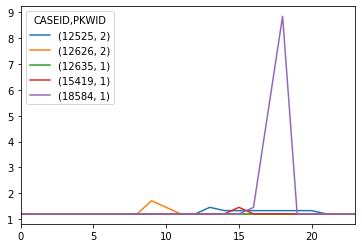

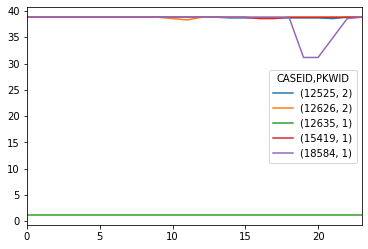

In [45]:
chargeMinProfiles.iloc[0:5,:].T.plot()
chargeMaxProfiles.iloc[0:5,:].T.plot()

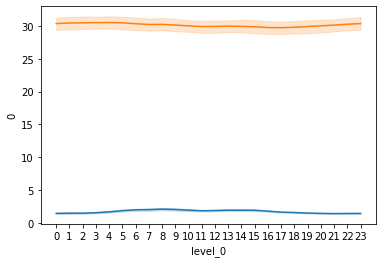

In [46]:
sns.lineplot(x='level_0', y=0, data=chargeMinProfiles.iloc[0:1000,:].unstack(level=[0,1]).reset_index(), sort=False)
sns.lineplot(x='level_0', y=0, data=chargeMaxProfiles.iloc[0:1000,:].unstack(level=[0,1]).reset_index(), sort=False)

# Section 3 Filtering, Aggregation & Output

## Filtering & Normalization

In [16]:
randNoPerProfile = createRandNo(driveProfiles)

profileSelectors = calcProfileSelectors(chargeProfiles,
                                            consumptionProfiles,
                                            driveProfiles,
                                            driveProfilesFuelAux,
                                            randNoPerProfile,
                                            scalars,
                                            fuelDriveTolerance=0.001,
                                            isBEV=True)

electricPowerProfiles = calcElectricPowerProfiles(consumptionProfiles,
                                                      driveProfilesFuelAux,
                                                      scalars,
                                                      profileSelectors,
                                                      scalarsProc,
                                                      filterIndex='indexCons')

chargeMaxProfilesDSM, chargeMinProfilesDSM = setUnconsideredBatProfiles(chargeMaxProfiles, chargeMinProfiles,
                                                                            profileSelectors, minValue=0,
                                                                            maxValue=9999)

profilesFilterConsMin, \
profilesFilterConsMax, \
profilesFilterDSMMin, \
profilesFilterDSMMax = indexFilter(chargeMaxProfiles,
                                       chargeMinProfiles, profileSelectors)

SOCMin, SOCMax = socProfileSelection(profilesFilterConsMin, profilesFilterConsMax,
                                         filter='singleValue', alpha=1)

socMinNorm, socMaxNorm = normalizeProfiles(scalars, SOCMin, SOCMax,
                                               normReferenceParam='Battery capacity')

There are 14065 considered profiles and 14052 DSM eligible profiles.


In [17]:
plugProfilesCons = filterConsProfiles(plugProfiles, profileSelectors, critCol='indexCons')
electricPowerProfilesCons = filterConsProfiles(electricPowerProfiles, profileSelectors, critCol='indexCons')
chargeProfilesUncontrolledCons = filterConsProfiles(chargeProfilesUncontrolled, profileSelectors, critCol='indexCons')
driveProfilesFuelAuxCons = filterConsProfiles(driveProfilesFuelAux, profileSelectors, critCol='indexCons')

## Aggregation & Correction

In [18]:
plugProfilesAgg = aggregateProfiles(plugProfilesCons)
electricPowerProfilesAgg = aggregateProfiles(electricPowerProfilesCons)
chargeProfilesUncontrolledAgg = aggregateProfiles(chargeProfilesUncontrolledCons)
driveProfilesFuelAuxAgg = aggregateProfiles(driveProfilesFuelAuxCons)

In [19]:
chargeProfilesUncontrolledCorr = correctProfiles(scalars, chargeProfilesUncontrolledAgg, 'electric')
electricPowerProfilesCorr = correctProfiles(scalars, electricPowerProfilesAgg, 'electric')
driveProfilesFuelAuxCorr = correctProfiles(scalars, driveProfilesFuelAuxAgg, 'fuel')

## Output processing

In [20]:
profileDictOut = dict(uncontrolledCharging=chargeProfilesUncontrolledCorr,
                          electricityDemandDriving=electricPowerProfilesCorr, SOCMax=socMaxNorm, SOCMin=socMinNorm,
                          gridConnectionShare=plugProfilesAgg, auxFuelDriveProfile=driveProfilesFuelAuxCorr)

writeProfilesToCSV(linkDict['linkOutput'],
                       profileDictOut,
                       singleFile=False,
                       strAdd='')

# writeAnnualOutputForREMix(profileDictOut, outputConfig, linkDict['linkOutputAnnual'],
#                         config['postprocessing']['hoursClone'], config['labels']['technologyLabel'],
#                         strAdd='_MR1_alpha1_batCap40_cons15')

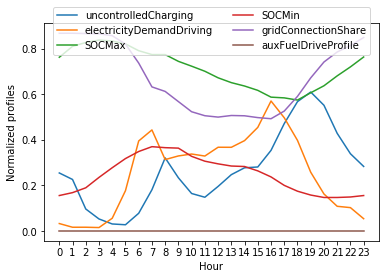

In [52]:
linePlot(profileDictOut, linkOutput=linkDict['linkPlots'], show=True, write=False)